# Regresión Lineal Simple

A continuación, vamos a ajustar un modelo de regresión lineal simple a un conjunto de datos en R. Suponga que el conjunto de datos proviene de una fábrica que elabora productos

Leemos nuestros datos con la función `read.table`# Podemos visualizar gráficamente estos intervalos de predicción

plot(RunSize, RunTime, xlab = "Tamaño de ejecución", 
     ylab = "Tiempo de ejecución", pch = 16)
abline(lsfit(RunSize, RunTime)) # Trazamos la recta de regresión estimada

lines(RunSize0, conf[, 2], lty = 2, lwd = 2, col = "green") # límites inferiores
lines(RunSize0, conf[, 3], lty = 2, lwd = 2, col = "green") # límites superiores

lines(RunSize0, pred[, 2], lty = 2, lwd = 2, col = "blue") # límites inferiores
lines(RunSize0, pred[, 3], lty = 2, lwd = 2, col = "blue") # límites superiores

In [ ]:
setwd(".")
production <- read.table("production.txt", header  = TRUE)
head(production)

In [2]:
dim(production)

[1] 20  3

Los datos que importamos a R se encuentran como data frame con nombre production.

Para cada caso se considera un tamaño del proceso o tamaño de la ejecución `(RunSize)` y un tiempo del proceso o tiempo de la ejecución `(RunTime)`. El tamaño del proceso representa la cantidad de artículos que se fabrica en un caso determinado, el tiempo del proceso representa la cantidad de minutos que toma elaborar los artículos en el caso especificado. En los datos anteriores, el primer caso indica que para elaborar 175 artículos se requirió un tiempo de 195 minutos. El segundo caso indica que para elaborar 189 artículos se tomó un tiempo de 215 minutos.

Aplicamos la función `attach` al data frame production para poder manipular las columnas mediante sus nombres

In [3]:
attach(production)

Hacemos el gráfico de dispersión

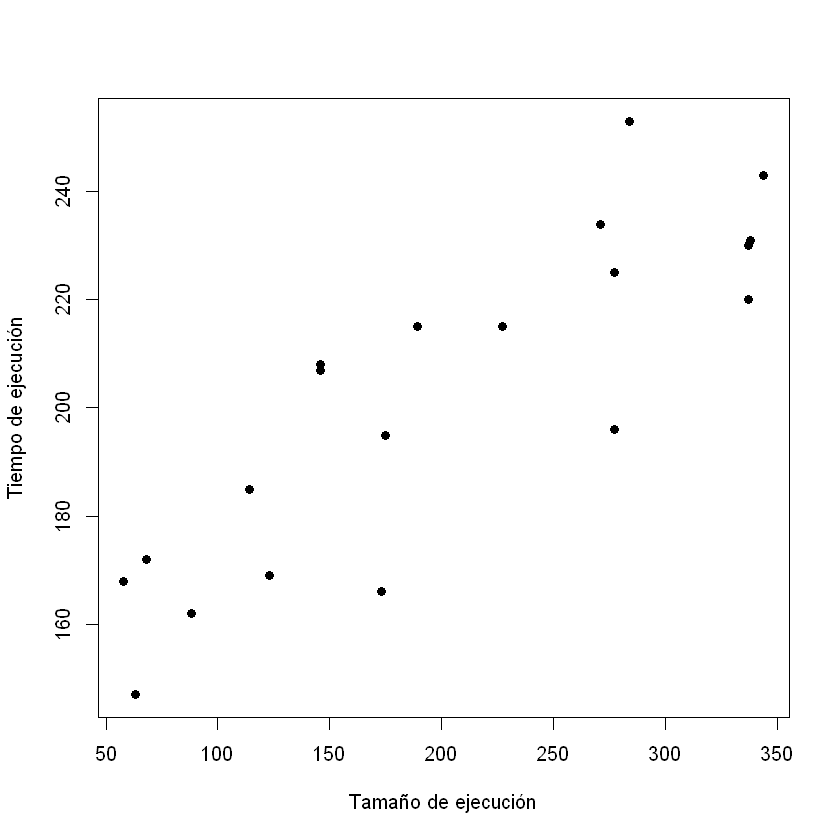

In [4]:
plot(RunSize, RunTime, xlab = "Tamaño de ejecución", 
     ylab = "Tiempo de ejecución", pch = 16)

Como observamos una relación aproximadamente lineal entre el tiempo de ejecución y el tamaño de ejecución, ajustamos un modelo de regresión lineal simple con la función `lm`, en donde la variable de respuesta es RunTime y la variable predictora es RunSize. Guardamos nuestro modelo ajustado con el nombre de `m1`

In [5]:
 (m1 <- lm(RunTime ~ RunSize))


Call:
lm(formula = RunTime ~ RunSize)

Coefficients:
(Intercept)      RunSize  
   149.7477       0.2592  


Obtenemos un resumen de nuestro modelo ajustado mediante la función `summary`

In [6]:
summary(m1)


Call:
lm(formula = RunTime ~ RunSize)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.597 -11.079   3.329   8.302  29.627 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 149.74770    8.32815   17.98 6.00e-13 ***
RunSize       0.25924    0.03714    6.98 1.61e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.25 on 18 degrees of freedom
Multiple R-squared:  0.7302,	Adjusted R-squared:  0.7152 
F-statistic: 48.72 on 1 and 18 DF,  p-value: 1.615e-06


Recordemos que el modelo de regresión lineal simple está dado por

$$y=\beta_0+\beta_1x+\epsilon$$

donde x es la variable predictora (en este caso `RunSize`), y es la variable de respuesta (en este caso `RunTime`), $\beta_0$ es un parámetro (asociado a la población) desconocido llamado intercepto, $\beta_1$ es otro parámetro desconocido llamado pendiente y $\epsilon$ es un error aleatorio con distribución normal, media cero y varianza constante $\sigma^2$.

Los valores de la columna "Estimate" que obtenemos de la salida de `summary(m1)`, es decir, 149.74770 y 0.25924 son estimados para ᵝ0 y ᵝ1 respectivamente. Al ser $\beta_0$ y $\beta_1$ parámetros fijos pero desconocidos, podemos contrastar las siguientes hipótesis

$$H_0:\beta_0=0\ vs\ H_1:\beta_1\ne0$$

$$H_0:\beta_1=0\ vs\ H_1:\beta_1\ne0$$

Los valores de la columna Pr(>|t|), 6.00e-13 y 1.61e-06 son p-values correspondientes a estos contrastes de hipótesis. Por lo que en ambos casos se rechazan las hipótesis nulas al ser los p-values muy pequeños en comparación, por ejemplo, con α=0.05 o α=0.01.

Note como el aceptar la hipótesis H1: β1≠0 aumenta un poco más nuestra confianza sobre la relación lineal entre x y y, ya que si ocurriera que β=0, tendríamos

$$y=\beta_0+\epsilon$$

El valor `R-squared`: 0.7302, llamado coeficiente de determinación de la recta de regresión, se define como la proporción de la variabilidad muestral total en las y's explicada por el modelo de regresión. La razón por la cual esta cantidad es llamada R² es porque es igual al cuadrado de la correlación entre $y$ y $x$.

Graficamos nuestros datos nuevamente, pero ahora con la recta de regresión ajustada

[1] 198.7441

[1] 194.5962

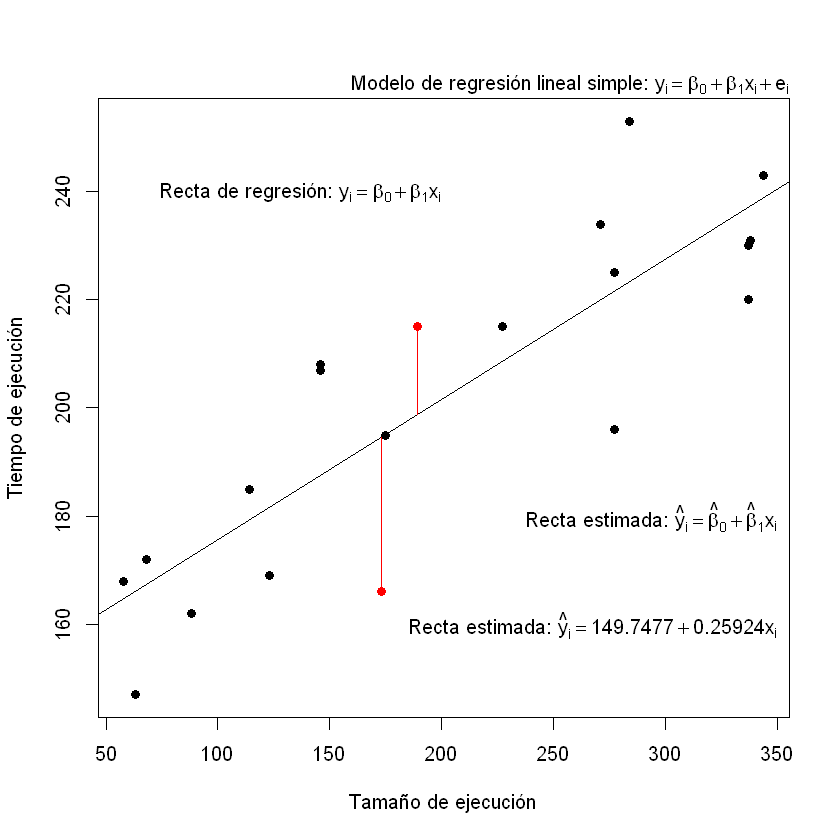

In [19]:

 plot(RunSize, RunTime, xlab = "Tamaño de ejecución", 
     ylab = "Tiempo de ejecución", pch = 16)
abline(lsfit(RunSize, RunTime)) # Trazamos la recta de regresión estimada
mtext(expression(paste('Modelo de regresión lineal simple:',
                       ' ',
                       y[i] == beta[0] + beta[1]*x[i] + e[i])),
      side = 3, adj=1, font = 2)

# Recta de regresión poblacional

text(x = 200, y = 240, expression(paste('Recta de regresión:',
                                        ' ',
                                        y[i] == beta[0] + beta[1]*x[i])),
     adj = 1, font = 2)

# Recta de regresión estimada

text(x = 350, y = 180, expression(paste('Recta estimada:',
                                        ' ',
                                        hat(y)[i] == hat(beta)[0] + hat(beta)[1]*x[i])),
     adj = 1, font = 2)

# Recta de regresión estimada

text(x = 350, y = 160, expression(paste('Recta estimada:',
                                        ' ',
                                        hat(y)[i] == 149.74770 + 0.25924*x[i])),
     adj = 1, font = 2)

# Residuales

points(189, 215, pch=16, col = "red") # Punto muestral
149.74770 + 0.25924 * 189 # Valor y sobre la recta estimada
## [1] 198.7441
lines(c(189, 189), c(198.7441, 215), col = "red")

points(173, 166, pch=16, col = "red") # Punto muestral
149.74770 + 0.25924 * 173 # Valor y sobre la recta estimada
## [1] 194.5962
lines(c(173, 173), c(166, 194.5962), col = "red")



Encontramos intervalos de confianza del 95% para el intercepto y la pendiente del modelo de regresión lineal simple

In [21]:
round(confint(m1, level = 0.95), 3)

2.5 %   97.5 % 
(Intercept) 132.251 167.244
RunSize       0.181   0.337

Al ser β0 y β1 parámetros desconocidos, así lo es también la verdadera recta de regresión y=β0+β1x. Ahora encontramos intervalos de confianza del 95% para la recta de regresión poblacional en algunos valores de x `(RunSize)`.

In [22]:
RunSize0 <- c(50,100,150,200,250,300,350) # Algunos posibles valores de RunSize

(conf <- predict(m1, newdata = 
                   data.frame(RunSize = RunSize0), 
                 interval = "confidence", level = 0.95))

fit      lwr      upr     
1 162.7099 148.6204 176.7994
2 175.6720 164.6568 186.6872
3 188.6342 179.9969 197.2714
4 201.5963 193.9600 209.2326
5 214.5585 206.0455 223.0714
6 227.5206 216.7006 238.3407
7 240.4828 226.6220 254.3435

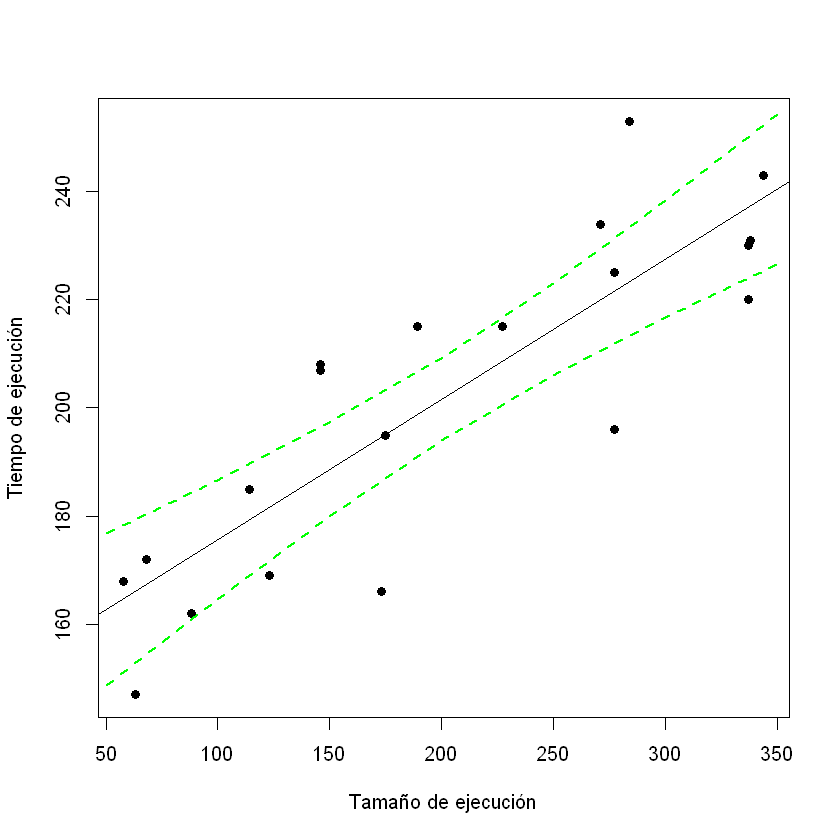

In [23]:
plot(RunSize, RunTime, xlab = "Tamaño de ejecución", 
     ylab = "Tiempo de ejecución", pch = 16)
abline(lsfit(RunSize, RunTime)) # Trazamos la recta de regresión estimada

lines(RunSize0, conf[, 2], lty = 2, lwd = 2, col = "green") # límites inferiores
lines(RunSize0, conf[, 3], lty = 2, lwd = 2, col = "green") # límites superiores

También podemos encontrar intervalos de predicción del 95% para el valor real de la variable de respuesta y (RunTime) en algunos valores de x (RunSize)

In [25]:
(pred <- predict(m1, newdata = 
          data.frame(RunSize = RunSize0), 
        interval = "prediction", level = 0.95))

fit      lwr      upr     
1 162.7099 125.7720 199.6478
2 175.6720 139.7940 211.5500
3 188.6342 153.4135 223.8548
4 201.5963 166.6076 236.5850
5 214.5585 179.3681 249.7489
6 227.5206 191.7021 263.3392
7 240.4828 203.6315 277.3340

Podemos visualizar gráficamente estos intervalos de predicción

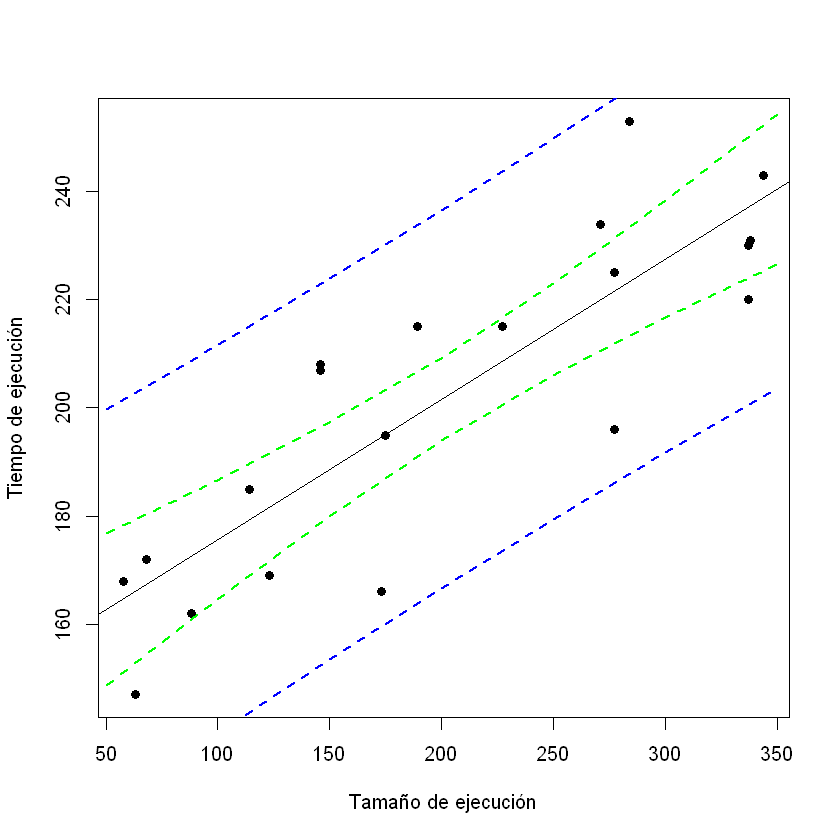

In [26]:
plot(RunSize, RunTime, xlab = "Tamaño de ejecución", 
     ylab = "Tiempo de ejecución", pch = 16)
abline(lsfit(RunSize, RunTime)) # Trazamos la recta de regresión estimada

lines(RunSize0, conf[, 2], lty = 2, lwd = 2, col = "green") # límites inferiores
lines(RunSize0, conf[, 3], lty = 2, lwd = 2, col = "green") # límites superiores

lines(RunSize0, pred[, 2], lty = 2, lwd = 2, col = "blue") # límites inferiores
lines(RunSize0, pred[, 3], lty = 2, lwd = 2, col = "blue") # límites superiores

Note como los intervalos de confianza están contenidos dentro de los intervalos de predicción correspondientes.

# Gráfico de Diagnóstico de R

Cuando usamos un modelo de regresión, hacemos una serie de suposiciones. Entonces debemos hacer diagnósticos de regresión para verificar las supocisiones.

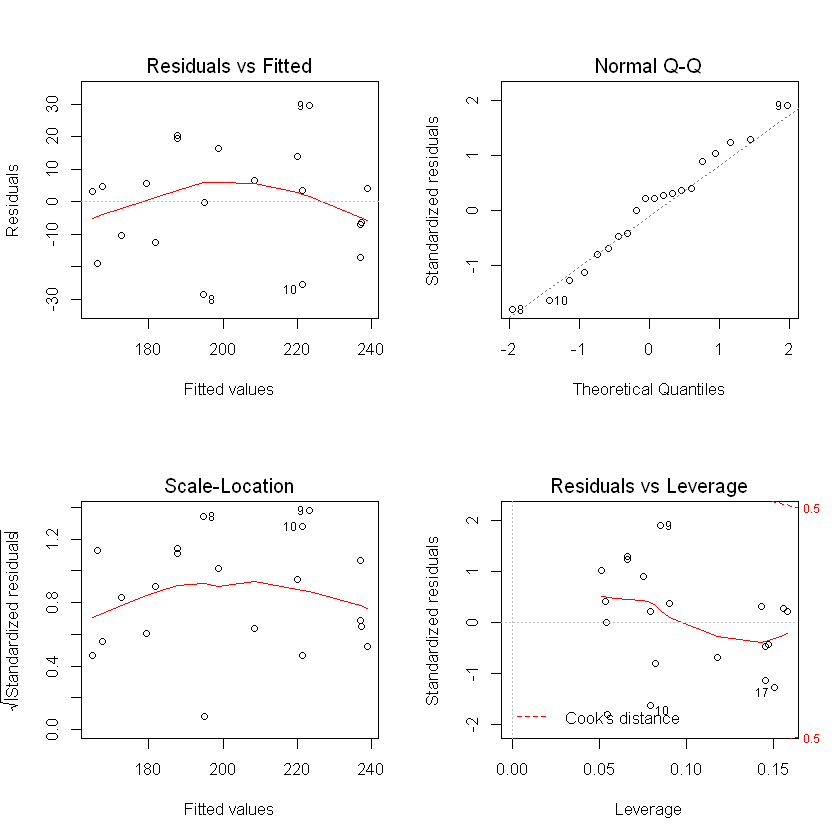

In [28]:
par(mfrow = c(2, 2))
plot(m1)

In [29]:
dev.off()

null device 
          1

Los gráficos de dispersión de residuales contra los valores ajustados no muestran algún patrón o tienen un comportamiento que podríamos considerar como aleatorio. Esto refuerza la suposición de aleatoriedad en los errores y nos da una mayor confianza de que el modelo de regresión lineal simple es adecuado en este ejemplo.

Estos mismos gráficos muestran una dispersión mas o menos constante que soporta la supoción inicial de que el error aleatorio tiene varianza constante.

El gráfico Normal Q-Q, soporta la supoción inicial de que el error tiene una distribución normal, porque los puntos se ajustan muy bien a la recta que se muestra en el gráfico.

El gráfico Residuals vs Leverage muestra que no hay puntos outliers o puntos palanca en este caso.

### Clasificación

Un enfoque para clasificación que se desarrolló en la comunidad de las ciencias computacionales en los años 90 y que ha crecido en popularidad desde entonces son las máquinas de vectores de soporte (MVS o SVM por sus siglas en inglés). Las MVS han mostrado un buen desempeño en una variedad de contextos, y frecuentemente se les considera como uno de los mejores clasificadores.

Clasificador de vectores 

#### Clasificador de Vecotres de Soporte

Cargamos el paquete e1071 para ajustar máquinas de vectores de soporte

In [30]:
suppressMessages(suppressWarnings(library(dplyr))) # también usaremos dplyr
install.packages("e1071") # para instalarlo
library(e1071) 

also installing the dependency 'proxy'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
proxy 0.4-25 0.4-26              TRUE
e1071  1.7-6  1.7-7              TRUE

  Binaries will be installed
package 'proxy' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\eherr\AppData\Local\Temp\RtmpsBRtf7\downloaded_packages


Warning message:
"package 'e1071' was built under R version 3.6.3"

Consideramos el siguiente conjunto de datos que corresponde a dos clases

In [34]:
dat <- read.table("Datos.txt", header  = TRUE)
head(dat)

x.1        x.2         y 
1 -1.6150201 -0.64184511 -1
2  0.3997080  0.42741829 -1
3 -1.3125476 -1.55267436 -1
4 -0.3218616 -1.32913203 -1
5 -1.4774699  1.44241063 -1
6 -1.3824493  0.03698684 -1

Observamos estos datos gráficamente



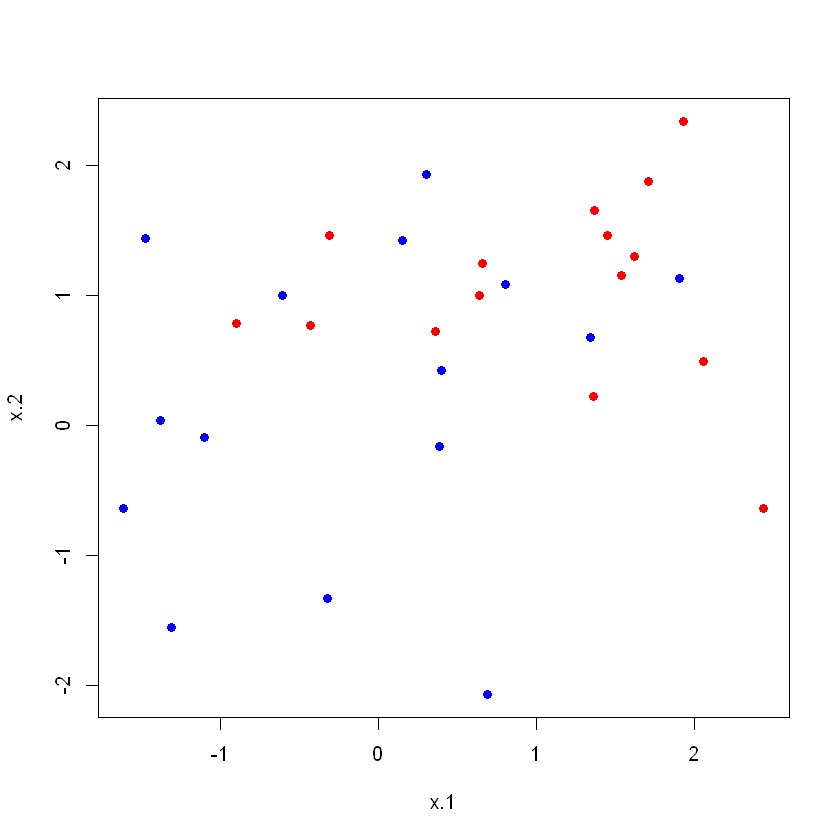

In [37]:
plot(dat[,-3], col = (3-dat[,3]), pch = 16)

Nuestro objetivo es desarrollar un clasificador basado en los datos que clasificará una observación de prueba usando sus medidas características.

Convertimos la matriz de datos a data frame y convertimos la columna y a factor:

In [46]:
dat <- as.data.frame(dat)
dat <- dat %>% mutate(y = factor(y))
tail(dat)

x.1       x.2       y
25 2.0577155 0.4951834 1
26 0.6402795 0.9984085 1
27 0.6562678 1.2468602 1
28 1.5369688 1.1582702 1
29 1.4492490 1.4664123 1
30 0.3584979 0.7244615 1

In [47]:
str(dat)

'data.frame':	30 obs. of  3 variables:
 $ x.1: num  -1.615 0.4 -1.313 -0.322 -1.477 ...
 $ x.2: num  -0.642 0.427 -1.553 -1.329 1.442 ...
 $ y  : Factor w/ 2 levels "-1","1": 1 1 1 1 1 1 1 1 1 1 ...


Ajustamos el clasificador de vectores de soporte con la función svm

In [48]:
svmfit <- svm(y~., data = dat, kernel = "linear", 
              cost = 10, scale = FALSE)

De manera simple, un kernel es una función que cuantifica la similaridad de dos observaciones, existen kernel lineal, polinomial, radial, etc.

El valor del parámetro cost en la práctica generalmente se elige por medio de una técnica de remuestreo conocida como validación-cruzada. Al incrementar el valor del parámetro cost por lo general conduce a cometer menos errores de clasificación con el conjunto que se está usando para ajustar el modelo, sin embargo, esto no significa que se cometerían menos errores al clasificar en la práctica, ya que podría ocurrir que estemos sobreajustando el modelo, lo que en términos muy simples significaría que este esta siguiendo el comportamiento de los errores.

A continuación, mostramos el clasificador de vectores de soporte junto con las observaciones. Los vectores de soporte se muestran como x's

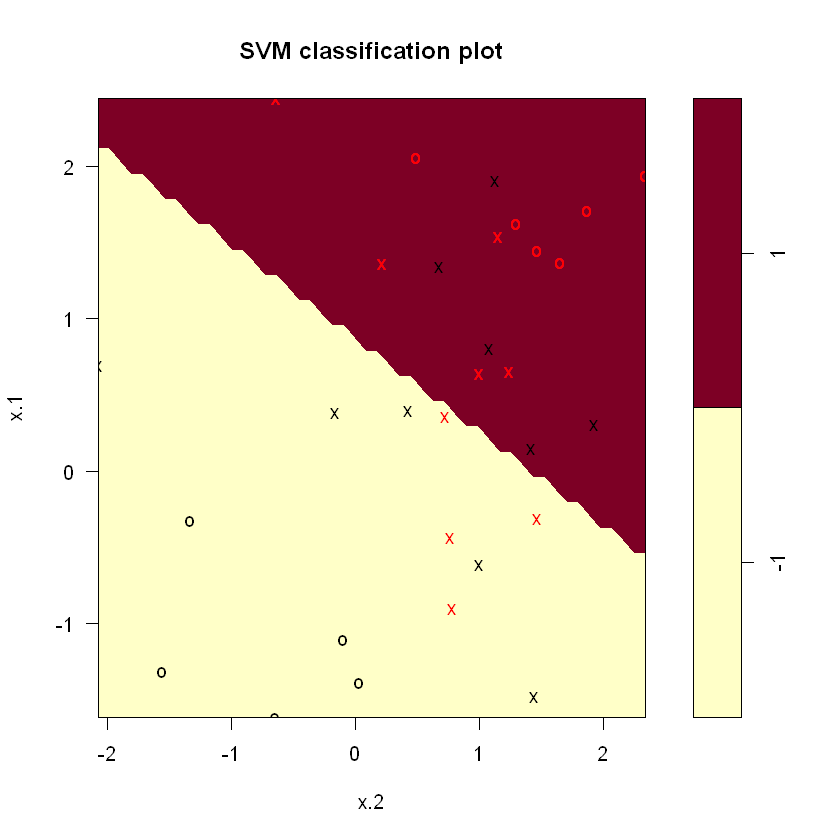

In [49]:
plot(svmfit, dat)

También podemos observar los índices (números de filas en el data frame) que corresponden a vectores de soporte

In [50]:
svmfit$index

[1]  2  5  8  9 10 11 12 13 14 15 17 20 21 23 24 26 27 28 30

In [51]:
length(svmfit$index)

[1] 19

Mostramos un breve resumen del ajuste

In [52]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  19

 ( 10 9 )


Number of Classes:  2 

Levels: 
 -1 1




Volvemos a realizar el ajuste pero ahora con el valor del parámetro cost = 0.1

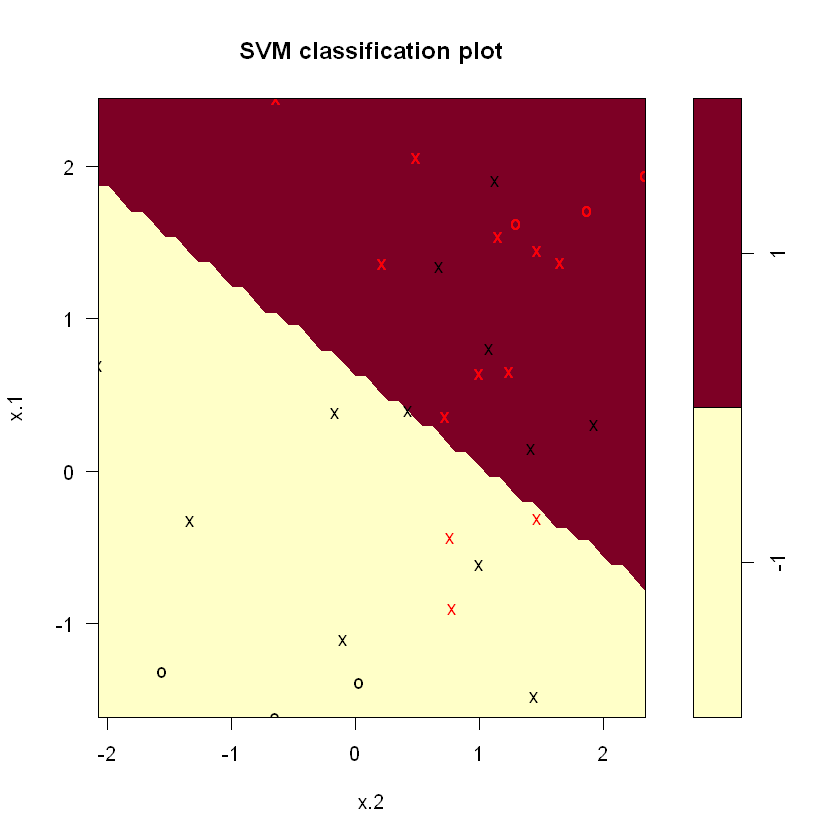

In [53]:
svmfit <- svm(y~., data = dat, kernel = "linear", 
cost = 0.1, scale = FALSE)
plot(svmfit, dat)

Tenemos más vectores de soporte

In [54]:
length(svmfit$index)

[1] 24

In [55]:
svmfit$index

[1]  2  4  5  7  8  9 10 11 12 13 14 15 17 20 21 22 23 24 25 26 27 28 29 30

El siguiente comando indica que queremos comparar MVS con un kernel lineal, usando un rago de valores del parámetro cost

In [56]:
set.seed(524)
tune.out <- tune(svm, y~., data = dat, kernel = "linear", 
ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.3 

- Detailed performance results:
   cost     error dispersion
1 1e-03 0.7333333  0.1405457
2 1e-02 0.7333333  0.1405457
3 1e-01 0.3000000  0.2459549
4 1e+00 0.3000000  0.2459549
5 5e+00 0.3000000  0.2459549
6 1e+01 0.3000000  0.2459549
7 1e+02 0.3000000  0.2459549


Elegimos el mejor modelo ajustado

In [57]:
bestmod <- tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  24

 ( 12 12 )


Number of Classes:  2 

Levels: 
 -1 1




## Máquinas de Vectores Soporte

Consideremos datos con una frontera de clase no lineal

In [63]:
dat <- read.csv("dat.csv", header = TRUE)
tail(dat)

x.1         x.2         y
195  0.79982903 -0.99609861 2
196 -0.11139607 -0.01392581 2
197  0.02634634  1.64001768 2
198 -0.07468730 -0.16677138 2
199 -0.89845044  1.13418943 2
200 -0.85972572 -0.81256897 2

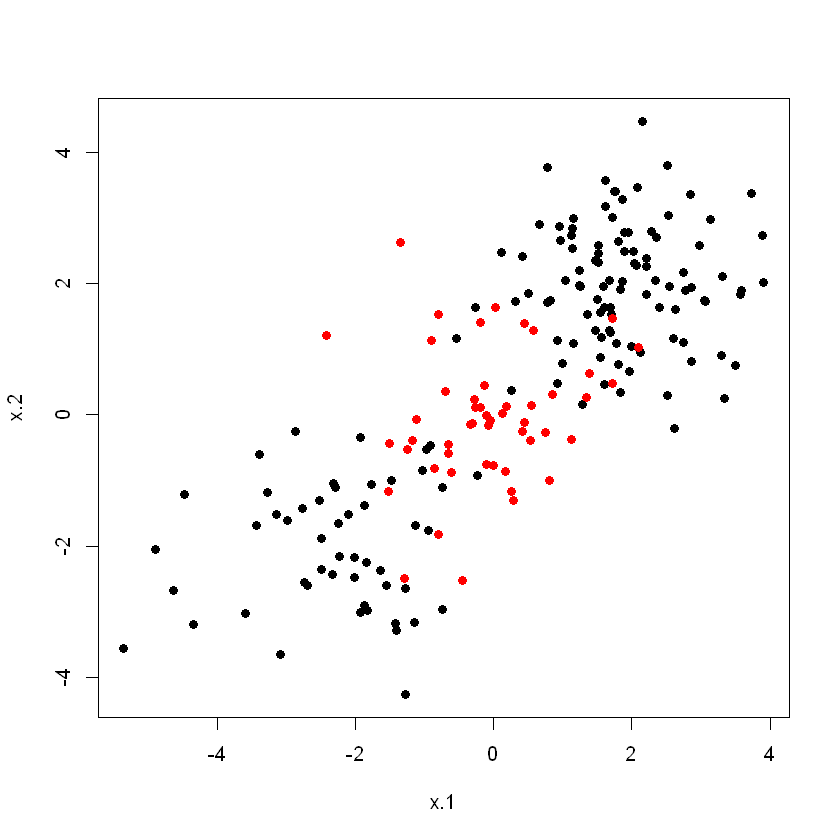

In [66]:
plot(dat[,-3], col = dat[,3], pch = 16)

Generamos índices para el conjunto de entrenamiento

In [67]:
train <- sample(200, 100)
tail(as.data.frame(train))

train
95   54  
96   33  
97  105  
98  118  
99   46  
100  39

Ajustamos una máquina de vectores de soporte con un kernel radial y valores de los parámetros gamma = 1 y cost = 1 usando el conjunto de entrenamiento

In [70]:
svmfit <- svm(y~., data = dat[train, ], 
               kernel = "radial", gamma = 1, cost = 1)
plot(svmfit, dat[train, ])